### Machine Learning - Lista 06
#### Douglas Gaspar Feitosa Freitas - 473552

#### Questão 1
##### Considere o conjunto de dados disponível em **quake.csv**, organizado em 2 colunas de atributos. Os dados referem-se a latitudes e longitudes de locais em que foram registrados terremotos. Maiores detalhes sobre os dados podem ser conferidos em *https://www.openml.org/d/772*.
##### a) Avalie o algoritmo K-médias com distância Euclidiana na tarefa de agrupamento para tais dados. O número de grupos deve ser escolhido entre os valores 4, 5, 6, . . . , 19, 20 a partir do índice DB (Davies-Bouldin). Plote o melhor resultado de agrupamento obtido. **Observação**: Em cada avaliação repita múltiplas vezes (por exemplo, 20) a execução do algoritmo K-médias, escolhendo a solução com melhor erro de reconstrução.

In [137]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from numpy.linalg import inv

# Carregando os dados
quake_data = pd.read_csv('quake.csv')

# Exibindo as primeiras linhas do arquivo quake.csv para verificação
quake_data.head()


,-5.225999999999999801e+01,2.830000000000000071e+01
0,45.53,150.93
1,41.85,142.78
2,29.19,141.15
3,-21.66,169.81
4,23.09,120.58


In [138]:
# Normalizando os dados
scaler = StandardScaler()
quake_data_scaled = scaler.fit_transform(quake_data) 

# Algoritmo de K-médias
def k_means(X, k, max_iters=300, metric="euclidean"):
    # Passo 1: Inicializar centroides aleatoriamente
    #np.random.seed(42)
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    
    for _ in range(max_iters):
        # Passo 2: Atribuir cada ponto ao centroide mais próximo
        distances = cdist(X, centroids, metric=metric)
        labels = np.argmin(distances, axis=1)
        
        # Passo 3: Recalcular os centroides
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        
        # Se os centroides não mudaram, sair do loop
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    
    # Retornar labels e centroides finais
    return labels, centroids

# Função para calcular o índice Davies-Bouldin
def calculate_db_index(X, labels, centroids):
    n_clusters = len(centroids)
    intra_cluster_distances = np.zeros(n_clusters)
    inter_cluster_distances = np.zeros((n_clusters, n_clusters))
    
    # Passo 1: Calcular as distâncias intra-cluster (S_i)
    for i in range(n_clusters):
        cluster_points = X[labels == i]
        intra_cluster_distances[i] = np.mean(np.linalg.norm(cluster_points - centroids[i], axis=1))
    
    # Passo 2: Calcular as distâncias entre os centroides (M_ij)
    for i in range(n_clusters):
        for j in range(n_clusters):
            if i != j:
                inter_cluster_distances[i, j] = np.linalg.norm(centroids[i] - centroids[j])
    
    # Passo 3: Calcular o índice R_ij para cada par de clusters
    R = np.zeros(n_clusters)
    for i in range(n_clusters):
        R[i] = np.max([(intra_cluster_distances[i] + intra_cluster_distances[j]) / inter_cluster_distances[i, j] 
                        for j in range(n_clusters) if i != j])
    
    # Passo 4: Calcular o índice Davies-Bouldin
    db_index = np.mean(R)
    return db_index

# Variando o número de clusters de 4 a 20 e calculando o índice DB
best_db_index = float('inf')
best_k = None
best_labels = None
best_centroids = None

for k in range(4, 21):
    db_index_array = []
    for _ in range(20):
        labels, centroids = k_means(quake_data_scaled, k)
        db_index_array.append(calculate_db_index(quake_data_scaled, labels, centroids))
    db_index = np.min(db_index_array)
    
    # Salvando o melhor índice DB
    if db_index < best_db_index:
        best_db_index = db_index
        best_k = k
        best_labels = labels
        best_centroids = centroids

best_k, best_db_index


(6, 0.5564378731908873)

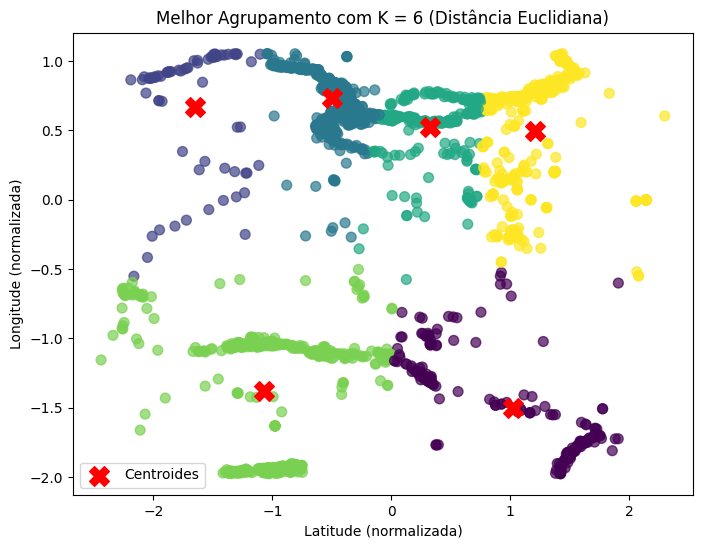

In [139]:
# Visualização do melhor agrupamento obtido com k = 20
plt.figure(figsize=(8, 6))

# Plotando os pontos dos terremotos, coloridos pelos labels dos clusters
plt.scatter(quake_data_scaled[:, 0], quake_data_scaled[:, 1], c=best_labels, cmap='viridis', s=50, alpha=0.7)

# Plotando os centroides dos clusters
plt.scatter(best_centroids[:, 0], best_centroids[:, 1], c='red', s=200, marker='X', label='Centroides')

plt.title(f'Melhor Agrupamento com K = {best_k} (Distância Euclidiana)')
plt.xlabel('Latitude (normalizada)')
plt.ylabel('Longitude (normalizada)')
plt.legend()
plt.show()


##### b) Repita o item anterior considerando a distância de Mahalanobis.

In [140]:
# Variando o número de clusters de 4 a 20 e calculando o índice DB para distância de Mahalanobis
best_db_index_mahalanobis = float('inf')
best_k_mahalanobis = None
best_labels_mahalanobis = None
best_centroids_mahalanobis = None

for k in range(4, 21):
    db_index_array = []
    for _ in range(20):
        labels, centroids = k_means(quake_data_scaled, k, metric="mahalanobis")
        db_index_array.append(calculate_db_index(quake_data_scaled, labels, centroids))
    db_index = np.min(db_index_array)
    
    # Salvando o melhor índice DB
    if db_index < best_db_index_mahalanobis:
        best_db_index_mahalanobis = db_index
        best_k_mahalanobis = k
        best_labels_mahalanobis = labels
        best_centroids_mahalanobis = centroids

best_k_mahalanobis, best_db_index_mahalanobis


(6, 0.5544079828658227)

Melhor k (Mahalanobis): 6, Davies-Bouldin Index: 0.5544079828658227


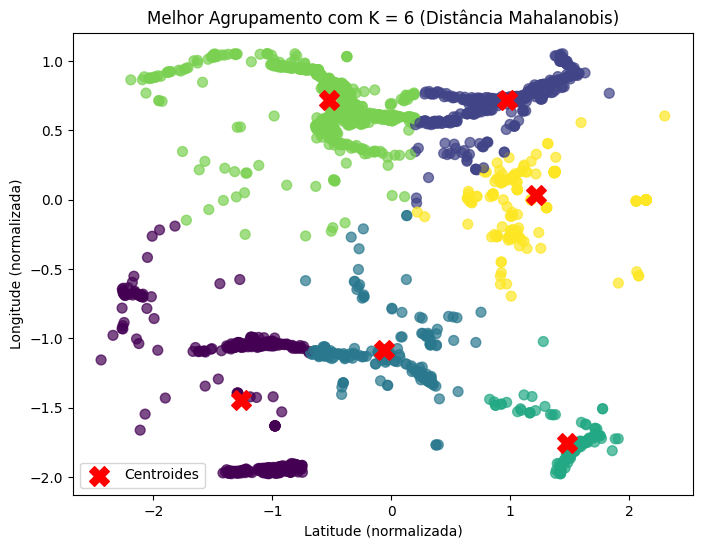

In [141]:
# Melhor k e índice DB com Mahalanobis
print(f"Melhor k (Mahalanobis): {best_k_mahalanobis}, Davies-Bouldin Index: {best_db_index_mahalanobis}")

# Visualização do melhor agrupamento
plt.figure(figsize=(8, 6))
plt.scatter(quake_data_scaled[:, 0], quake_data_scaled[:, 1], c=best_labels_mahalanobis, cmap='viridis', s=50, alpha=0.7)
plt.scatter(best_centroids_mahalanobis[:, 0], best_centroids_mahalanobis[:, 1], c='red', s=200, marker='X', label='Centroides')
plt.title(f'Melhor Agrupamento com K = {best_k_mahalanobis} (Distância Mahalanobis)')
plt.xlabel('Latitude (normalizada)')
plt.ylabel('Longitude (normalizada)')
plt.legend()
plt.show()

#### Questão 2

##### Considere o conjunto de dados disponível em **penguins.csv**, organizado em 5 colunas, sendo 4 colunas de atributos e a última a classe do padrão. Os dados referem-se a medições anatômicas de pinguins da Antártida, classificados nas espécies Adelie, Chinstrap e Gentoo. Maiores detalhes sobre os dados podem ser conferidos em *https://allisonhorst.github.io/palmerpenguins/*.
##### a) Apresente a projeção em 2 dimensões dos padrões acima obtida pelo método PCA (análise dos componentes principais).
##### b) Ainda considerando o item anterior, calcule e mostre a variância explicada obtida quando a dimensão projetada é modificada (1,2,3 ou 4).
##### **Observação:** Não esqueça de normalizar os dados em ambas as questões.

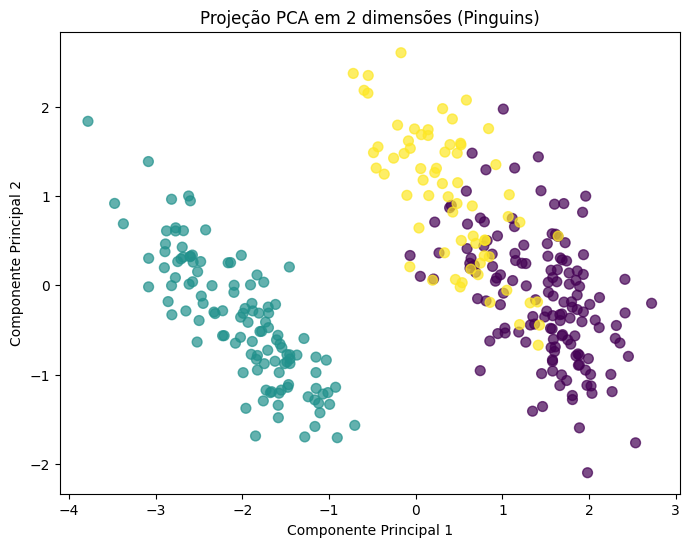

1 Componentes - Variância Explicada: 0.6859
2 Componentes - Variância Explicada: 0.8808
3 Componentes - Variância Explicada: 0.9731
4 Componentes - Variância Explicada: 1.0000


In [142]:
# Carregar os dados de penguins.csv
penguin_data = pd.read_csv('penguins.csv')

# Separar os atributos e classes
X_penguins = penguin_data.iloc[:, :-1]
y_penguins = penguin_data.iloc[:, -1]

# Normalizar os dados
scaler_penguins = StandardScaler()
X_penguins_scaled = scaler_penguins.fit_transform(X_penguins)

# Função para implementar o PCA
def pca(X, n_components):
    # Passo 1: Centralizar os dados (subtrair a média de cada variável)
    X_centered = X - np.mean(X, axis=0)
    
    # Passo 2: Calcular a matriz de covariância
    covariance_matrix = np.cov(X_centered.T)
    
    # Passo 3: Calcular autovalores e autovetores da matriz de covariância
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    
    # Passo 4: Ordenar os autovalores em ordem decrescente e selecionar os maiores
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    
    # Passo 5: Selecionar os autovetores correspondentes aos maiores autovalores
    selected_eigenvectors = sorted_eigenvectors[:, :n_components]
    
    # Passo 6: Projetar os dados nas componentes principais selecionadas
    X_pca = np.dot(X_centered, selected_eigenvectors)
    
    # Variância explicada
    explained_variance = sorted_eigenvalues[:n_components] / np.sum(sorted_eigenvalues)
    
    return X_pca, explained_variance

# Aplicando PCA para 2 componentes
X_pca, explained_variance = pca(X_penguins_scaled, n_components=2)

# Plotando a projeção em 2D
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=pd.factorize(y_penguins)[0], cmap='viridis', s=50, alpha=0.7)
plt.title('Projeção PCA em 2 dimensões (Pinguins)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

# Variância explicada para diferentes números de componentes
for n in range(1, 5):
    X_pca, explained_variance = pca(X_penguins_scaled, n_components=n)
    print(f'{n} Componentes - Variância Explicada: {explained_variance.sum():.4f}')